<a href="https://colab.research.google.com/github/pmpatel-udallas/PChemLab/blob/main/Rotation_4_Quantum_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotation 4: Quantum Theory

This last module will go over how to do "advanced" Matplotlib plotting to include various features as well as using a solver to solve the equations for a finite well.

## Import Packages

In [1]:
import numpy as np
from numpy import *
import os,sys,re # Import regex
import pandas as pd # DataFrame analysis

# Plotting
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D # 3D plots
from matplotlib import cm # Colormaps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Inset figures into plots
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

#Create lines for custom legends
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

from glob import glob

# Insert a progress bar to show the progress of the script
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


## 6.1 Combining Experimental and Computational Spectra

### 6.1.1 Converting the computed values to a spectrum

The extracted results from the ORCA calculations contain information about the excitation wavelength ($\lambda$) and the oscillator strength ($f$). You will need to broaden each transition using

$$\varepsilon_i(\lambda)=1.3062974*10^8\dfrac{f_i}{\sigma} \text{exp}\bigg[-\bigg(\dfrac{1/\lambda-1/\lambda_i}{\sigma}\bigg)^2\bigg] \ \ \ \ \ \ (1)$$

where $i$ represents the $i^\text{th}$ electronic excitation, $\lambda$ is the excitation wavelength in nm, $f_i$ is the oscillator strength (a.u.), and $\sigma$ is the parameter for peak broadening. Setting $\sigma$ = 0.2 eV = 1/6199.2 nm$^{-1}$ = 10$^{7}$/6199.2 cm$^{-1}$ will result in the following reduction

$$	\varepsilon_i(\lambda)=1.3062974*10^8\dfrac{f_i}{10^{7}/6199.2} \text{exp}\bigg[-\bigg(\dfrac{1/\lambda-1/\lambda_i}{1/6199.2}\bigg)^2\bigg] \ \ \ \ \ \ (2)
$$

Equation 2 above refers to how to broaden a single transition whereas the next equation covers how to do the sum of all the individual excitations.

$$
	\varepsilon(\lambda)=\sum_{i=1}^{n}\varepsilon_i(\lambda)=\sum_{i=1}^{n}\bigg(1.3062974*10^8\dfrac{f_i}{10^{7}/6199.2} \text{exp}\bigg[-\bigg(\dfrac{1/\lambda-1/\lambda_i}{1/6199.2}\bigg)^2\bigg]\bigg) \ \ \ \ \ \ (3)
$$

In Equation 3, your wavelengths ($\lambda$) are the x-values and $\lambda_i$ is the computed wavelength corresponding to the transition with oscillator strength $f_i$.

Below is the Python form of Equation 2.

In [ ]:
def e(X,h,f,sigma=1/3099.6/1.5):
  f2=10**7*sigma

  A=1.3062974*10**8
  e1=1/h-1/X
  return A*(f/f2)*np.exp(-(e1/sigma)**2)

### 6.1.2 Importing inset figures into matplotlib plots

Sometimes, you don't want to use PowerPoint or other software to combine images together because of loss of resolution, or the extra time to make sure everything is correct. So there are packages to create offset images that we can use to import images into a matplotlib figure.

In [ ]:
#Packages to Inset figures into plots
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

### 6.1.3 Import your experimental and computational data

The experimental data from the UV-vis will be in a csv format, so use `pd.read_csv()` instead of `pd.read_excel()`.

The computed spectra

In [ ]:
# Import your experimental data


### 6.1.4 For loops

In Python, a **`for` loop** is used to iterate over a sequence, such as a list, tuple, string, or range, allowing you to execute a block of code repeatedly for each item in the sequence.


#### 1. Basic Syntax
```python
for variable in sequence:
    # code block
```

*   variable: A placeholder for each element in the sequence.
*   sequence: The collection (e.g., list, tuple, string) you want to iterate over.

Example:
```python
fruits = ['apple', 'banana', 'cherry']
for fruit in fruits:
    print(fruit)
```

#### 2. Range
The `range()` function generates a sequence of numbers, which is often used in loops.
```python
for i in range(5):  # Generates numbers from 0 to 4
    print(i)
```

> `range(start, stop, step)` allows customization of the range.


You can get more detailed with the specification, like looping through different data types (`item in [1, 2, 3]` will give 1, 2, 3 for example).

Multidimensional lists can take advantage of loops within loops, also called **nested loops**
```python
for i in range(3):
    for j in range(2):
        print(f"i={i}, j={j}")
```


**You will use a for loop combined with your data to generate the computed spectra.**

You will need the `+=` operation, which adds a new value to the existing one and replaces that variable. In math terms,
`X+=1` is equal to `X=X+1`

This is useful in recursive algorithms and loops and other processes where you are compounding values or propagating numerical algorithms in time (e.g., diffusion).

In [ ]:
# Define the linear space for your computed spectra (match the experimental range)
X=

#Start of with a list of zeros. You will use the += operation to add the contributions of each computed peak
comp_spec=np.zeros(len(X))


#Define the for loop


### 6.1.5 Custom Legends

```python
custom_lines = [Line2D([0], [0], color='C0', lw=3),
                Line2D([0], [0], color='k', lw=3,)]
ax1.legend(custom_lines, ['Computed', 'Experiment'],fontsize=20)
```

will generate a custom legend. In this case, the default blue (C0) and black (k) are used to label the computed and experimental spectra.

In [ ]:
#Create lines for custom legends
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

### 6.1.6 Plot the combined experimental and computed spectra

Now combine everything to plot the combined experimental and computed spectra to make an image like the image below.

![Fig6-7](https://drive.google.com/uc?id=1KhVfiQbxpcQ4peB0jHt1W0x5nPsCYs4C)

In [ ]:
# Include the for loop to loop through all twenty peaks


## 6.2 Finite Well

Consider a particle in a finite well model where
\begin{align}
	k_0 &= \sqrt{\dfrac{2m_e}{\hbar}(V_0-E)}\\
	k_1 &= \sqrt{\dfrac{2m_eE}{\hbar^2}}
\end{align}
To determine the energy eigenvalues from the wavefunction, we begin the derivation where $\Psi_\text{I}(x)$ and $\Psi_\text{II}(x)$ must follow the boundary conditions at x=0, i.e., $\Psi_\text{I}(0)=\Psi_\text{II}(0)$ and $\Psi'_\text{I}(0)=\Psi'_\text{II}(0)$.

\begin{align}
	Ae^{k_0(0)} &= Bsin(k_1*0)+Ccos(k_1*0)\\
	Ak_0e^{k_0(0)} &= Bk_1cos(k_1*0)-Ck_1sin(k_1*0)
\end{align}

By solving the system of Equations above,

\begin{align}
	C&=A\\
	B&=A\frac{k_0}{k_1}
\end{align}

At x=L, the system of equations containing $\Psi(L)$ and $\Psi'(L)$ is

\begin{align}
	De^{-k_0L} &= Bsin(k_1L)+Ccos(k_1L) \\
	De^{-k_0L} &= Bk_1cos(k_1L)-Ck_1sin(k_1L
\end{align}

By algebra,

\begin{align}
	Dk_0e^{-k_0L} &= A\dfrac{k_0^2}{k_1}sin(k_1L)+Ak_0cos(k_1L)\\
	Dk_0e^{-k_0L} &= -A\dfrac{k_0}{k_1}k_1cos(k_1L)+Ak_1sin(k_1L))
\end{align}

By equality, the above equations may be solved for the quantity $Dk_0e^{-k_0L}$

\begin{align}
	\dfrac{k_0^2}{k_1}sin(k_1L)+k_0cos(k_1L) &= -k_0cos(k_1L)+k_1sin(k_1L)\\
	k_0^2sin(k_1L)+k_1k_0cos(k_1L) &= -k_1k_0cos(k_1L)+k_1^2sin(k_1L)\\
	2k_1k_0cos(k_1L) &= (k_1^2-k_0^2)sin(k_1L)
\end{align}

\begin{equation}
	2k_1k_0 = (k_1^2-k_0^2)tan(k_1L)
\end{equation}

By substituting $k_0$ and $k_1$ into the above equation,

\begin{equation}
	2\bigg(\dfrac{2m_eE}{\hbar^2}\bigg)\sqrt{E(V_0-E)} = \bigg(\dfrac{2m_eE}{\hbar^2}-\dfrac{2m_e(V_0-E)}{\hbar^2}\bigg)tan\bigg(\sqrt{\dfrac{2m_eEL^2}{\hbar^2}}\bigg)
\end{equation}

\begin{equation}
	\dfrac{2\sqrt{E(V_0-E)}}{2E-V_0} = tan\bigg(\sqrt{\dfrac{2m_eEL^2}{\hbar^2}}\bigg)
\end{equation}

The values of $E$ where the two quantities in the above equation are equal correspond to the energy levels of the finite well. These functions can be plotted in Python to solve for all values of $E$.

For this module, let
\begin{align}
f(x) &= \dfrac{2\sqrt{E(V_0-E)}}{2E-V_0}\\
g(x) &= tan\bigg(\sqrt{\dfrac{2m_eEL^2}{\hbar^2}}\bigg)
\end{align}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### 6.2.1 Define Constants and useful functions

In [3]:
eV2J=1.60e-19 #J
h=6.62606957e-34 #J*s
hbar= h/(2*np.pi)
me=9.11e-31 #kg

# Define sample parameters
V0 = 10 #eV
LA= 1.0 #nm
L=LA*1e-10 #m

In [21]:
def f(Ei,V):
  '''Ei is in eV'''
  E=Ei*eV2J
  V=V0*eV2J
  a=2*np.sqrt(E*(V-E))
  b=2*E-V
  return a/b

def g(Ei,L):
  '''Ei is in eV'''
  E=Ei*eV2J
  a=2*me*E*(L**2)
  b= hbar**2
  c=np.sqrt(a/b)
  return np.tan(c)

def j(x):
  return f(x,V0)-g(x,L)

def E_pib(n,L=10):
  return (n**2)*(h**2)/(8*me*(L**2)*eV2J)

def wavelength(a,b):
  return h*2.998e8/((a-b)*eV2J)*1e9

def intersections(X2,Y2,Z2):
  roots_idx = np.argwhere(np.diff(np.sign(Y2-Z2)) != 0).flatten()
  Xint = X2[roots_idx]
  return Xint[1::2]

In [58]:
# Define sample parameters
V0 = 10.92 #eV
LA = 9.80234 #Angstrom

def finite_well(V0,LA):
  L = LA*1e-10 #m
  X= np.linspace(0.005,V0, 10000)
  Y= f(X,V0)
  Z= g(X,L)

  # Filter the data to remove values approaching the asymptote
  X2=X[np.abs(Z)<V0]
  Y2=Y[np.abs(Z)<V0]
  Z2=Z[np.abs(Z)<V0]

  intersections(X2,Y2,Z2).round(3)
  Xint = fsolve(j,intersections(X2,Y2,Z2))

  plt.plot(X2,Y2,'o',label='f(x)',markersize=1)
  plt.plot(X2,Z2,'o',label='g(x)',markersize=1)
  plt.xlim(0,10)
  plt.ylim(-10,10)
  plt.legend()
  plt.show()
  return Xint

### 6.2.2 Using the fsolve function


The fsolve function in Python is part of the scipy.optimize module and is used to find the roots of a system of nonlinear equations. It numerically solves the equation $f(x)=0$ where $f(x)$ is a callable function.

Use the `finite_well()` function shown here to calculate the excitation wavelengths using a finite well.

You will need the range of orbitals from HOMO-$n_1$ to LUMO+$n_2$ (where $n_1$ and $n_2$ are different orbital numbers relative to HOMO and LUMO) to calculate the well depth $V0$. The length of the box will be the Euclidean distance between the $N$ atoms in the respective molecules.

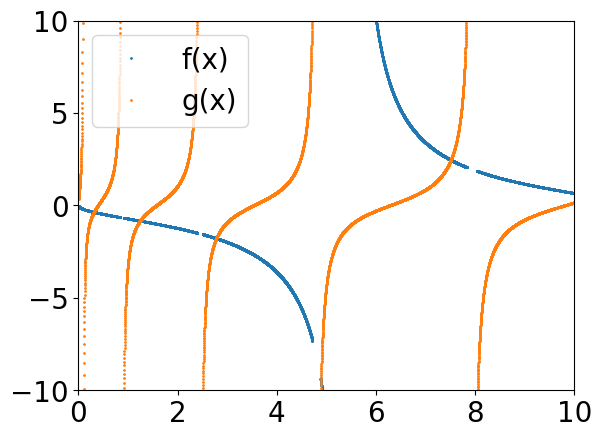

array([ 0.31172813,  1.24284739,  2.77956792,  4.89168612,  7.50905567,
       10.36944424])

In [59]:
# Example
finite_well(10.92,9.80234)

In [ ]:
# Then use the wavelength function to calculate the excitation for each dye